# EE399 HW1
## Ziwen


https://github.com/ZiwenLi0325/EE399.git

In [39]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
results = loadmat('yalefaces.mat')
X=results['X']

# (a)

Text(0, 0.5, 'j')

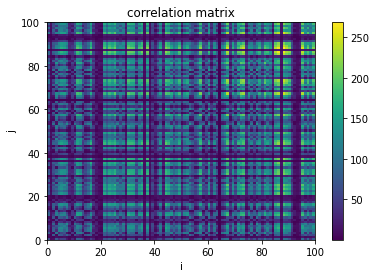

In [42]:
first_100 = X[:,0:100]
# print(first_100.shape)
C = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        C[i,j] = np.dot(first_100[:,i],first_100[:,j])
# print(C)
# print(C.shape)
plt.pcolor(C)
plt.colorbar()
plt.title("correlation matrix")
plt.xlabel("i")
plt.ylabel("j")

# (b)